<center> Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [9]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [10]:
df = pd.read_csv('data.csv',delimiter=',')
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [11]:
non_categorical = [column_name for column_name in df.columns if df[column_name].dtype == 'int64']
print('Dane liczbowe zawierają kolumny :\n\n',non_categorical,'\n')
categorical = [column_name for column_name in df.columns if df[column_name].dtype == 'object']
print('Dane tekstowe zawierają kolumny :\n\n',[i for i in categorical])


Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'] 

Dane tekstowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [12]:
#checking the empty rows in all columns
df.isnull().sum()
#changing the '?' with NaN
for column in df.columns:
    df.loc[df[column]=='?',column] = 'NaN' 
#deleting rows with missing data
for column in df.columns:
     df.drop(df[df[column]=='NaN'].index, inplace=True) 

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [13]:
X = df.drop(columns='income')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [14]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Score:0.7974204115057836


Text(0.5, 1.0, 'Model score: 0.7974204115057836')

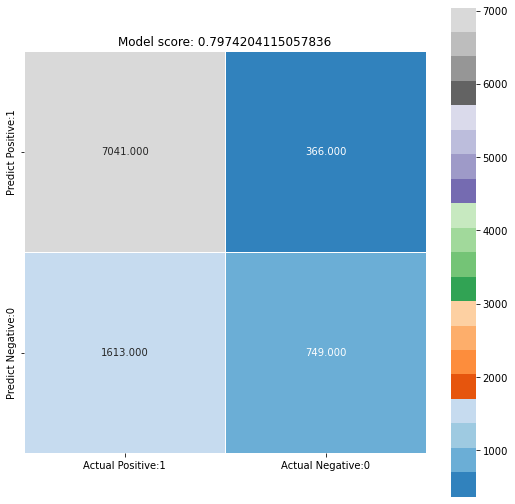

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
score=gnb.score(X_test,y_test)
print(f'Score:{score}')

#ocena jakości uzyskanych wyników
cmatrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cmatrix, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
#wyznaczenie  i wizualizacja macierzy konfuzji do oceny dokładności
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'tab20c')
plt.title( 'Model score: {0}'.format(score))

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Score:0.7975227761285699


Text(0.5, 1.0, 'Score: 0.7975227761285699')

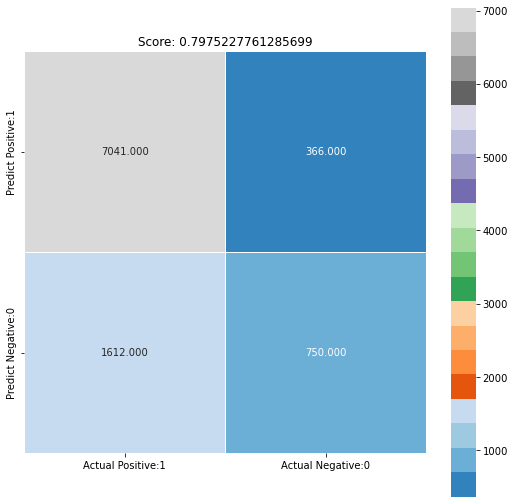

In [16]:
#kolumy race i native_country
X = df.drop(columns=['race','native_country'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'income', 'sex'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
score=gnb.score(X_test,y_test)
print(f'Score:{score}')

#ocena jakości uzyskanych wyników
cmatrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cmatrix, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
#wyznaczenie  i wizualizacja macierzy konfuzji do oceny dokładności
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'tab20c')
plt.title( 'Score: {0}'.format(score))


PODSUMOWANIE

W ramach laboratorium zapoznano się z naiwnym klasyfikatorem bayesowskim, który wykorzystano do przewidywania zarobków danej osoby(kolumna income). 

W obu przypadkach uzyskane modele dają zbliżone wyniki-wartość score w obu przypadkach wynosi około 80%. 

Na podstawie tej wartości można stwierdzić,że model daje bardzo zadowalające wyniki.